In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_moons  

In [3]:
x,y=make_moons(n_samples=250, noise=0.3)

In [4]:
df={'data 1':x[:,0],'data2':x[:,1],'y':y}

In [5]:
data=pd.DataFrame(df)

In [6]:
data.head(2)

,data 1,data2,y
0,-0.954504,0.726736,0
1,0.760345,-0.800907,1


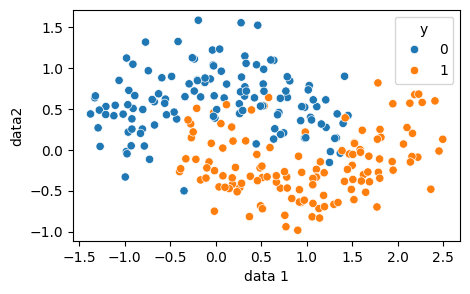

In [7]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='data 1',y='data2',data=data,hue='y')
plt.show()

In [8]:
x=data.iloc[:,:-1]
y=data['y']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB                          

In [12]:
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
dc.score(x_train,y_train)*100, dc.score(x_test,y_test)*100

(100.0, 88.0)

In [13]:
sv=SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100, sv.score(x_test,y_test)*100

(92.5, 94.0)

In [14]:
gnb=SVC()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)*100, gnb.score(x_test,y_test)*100

(92.5, 94.0)

 # vs 

In [45]:
from sklearn.ensemble import VotingClassifier                   # here we put whole classifier model together for voting

In [65]:
li=[('dc1',DecisionTreeClassifier()),
     ('sv1',SVC()),
     ('gnb1',GaussianNB())]


vc=VotingClassifier(li,weights=[1,2,3])              # weight through we find average
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dc1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())],
                 weights=[1, 2, 3])

In [66]:
vc.score(x_train,y_train)*100, vc.score(x_test,y_test)*100              

(91.0, 92.0)

# here it is  models vs votingclassifier prediction comparison (voting)

In [48]:
prd={'dc':dc.predict(x_test),'sv':sv.predict(x_test),'gnb':gnb.predict(x_test),'vc':vc.predict(x_test)}

In [49]:
data=pd.DataFrame(prd)

In [50]:
data.head(10)            # here we compare above models through dataframe, vs voting prediction

,dc,sv,gnb,vc
0,1,0,0,0
1,0,0,0,0
2,0,0,0,0
3,1,1,1,1
4,1,1,1,1
5,0,0,0,0
6,1,1,1,1
7,1,1,1,1
8,1,0,0,0
9,1,0,0,0
